# Quiz

### Question 1

Find the frequency, amplitude and phase of the following signal
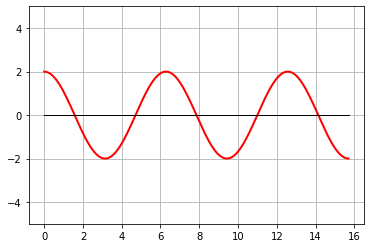

### Question 2
Write the equation of a simple vibration signal with frequency 10 kHz and amplitude 2 mm if at t=0,   
    a. the body starts at the mean position  
    b. the body starts at an extreme position   
    c. the body is at +1 mm from mean position

### Question 3

The diagram shows a simple practical control system. At time t, an input reference signal is passed. The output at time _t-1_ is multiplied with gain H and subtracted from the reference signal at time _t_ to give error signal E. E is multiplied with controller gain G to give the output at time _t_.

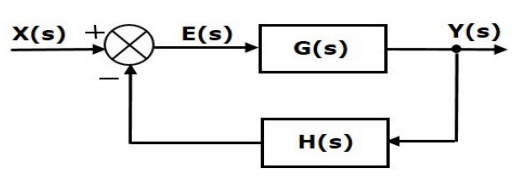

If the reference signal is a sinusoid with frequency 20 kHz, amplitude 5 V and phase of 30 degrees, and the control system processes every 0.5 seconds, find the error signal and output at t=2 seconds. G=10, H=5

In [1]:
# Read data from csv
import pandas as pd
import numpy as np

imu_data = pd.read_csv('./data/imu_data_car.csv')

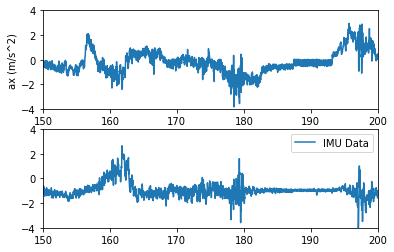

In [17]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

time = (imu_data['field.header.stamp'] - min(imu_data['field.header.stamp']))*1e-9
r = R.from_quat(np.transpose([imu_data['field.orientation.x'], imu_data['field.orientation.y'], imu_data['field.orientation.z'], imu_data['field.orientation.w']]))
(rot_roll, rot_pitch, rot_yaw) = np.transpose(r.as_euler('xyz', degrees=True))

acc_x = imu_data['field.linear_acceleration.x']
acc_y = imu_data['field.linear_acceleration.y']
acc_z = imu_data['field.linear_acceleration.z']

ideal = time.copy() * 0

fig, ax = plt.subplots(2, 1)
ax[0].plot(time, acc_x, label="IMU Data")
ax[0].set_ylim(-4, 4)
ax[0].set_xlim(150, 200)
ax[1].plot(time, acc_y, label="IMU Data")
ax[1].set_ylim(-4, 4)
ax[1].set_xlim(150, 200)
plt.legend()

ax[0].set_xlabel("Time (secs)")
ax[0].set_ylabel("ax (m/s^2)")

plt.show()